In [158]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, precision_score, recall_score

In [159]:
p=pd.read_csv("C:/Users/prave/OneDrive/Desktop/data/New folder/movies.csv")

In [160]:
p.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [161]:
p.describe()

,movieId
count,62423.000000
mean,122220.387646
std,63264.744844
min,1.000000
25%,82146.500000
50%,138022.000000
75%,173222.000000
max,209171.000000


In [162]:
p.tail()

,movieId,title,genres
62418,209157,We (2018),Drama
62419,209159,Window of the Soul (2001),Documentary
62420,209163,Bad Poems (2018),Comedy|Drama
62421,209169,A Girl Thing (2001),(no genres listed)
62422,209171,Women of Devil's Island (1962),Action|Adventure|Drama


In [163]:
p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62423 entries, 0 to 62422
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  62423 non-null  int64 
 1   title    62423 non-null  object
 2   genres   62423 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.4+ MB


In [164]:
p.columns

Index(['movieId', 'title', 'genres'], dtype='object')

In [165]:
print("Null data: ", p.isna().sum())
print("Duplicate data: ", p.duplicated().sum())

Null data:  movieId    0
title      0
genres     0
dtype: int64
Duplicate data:  0


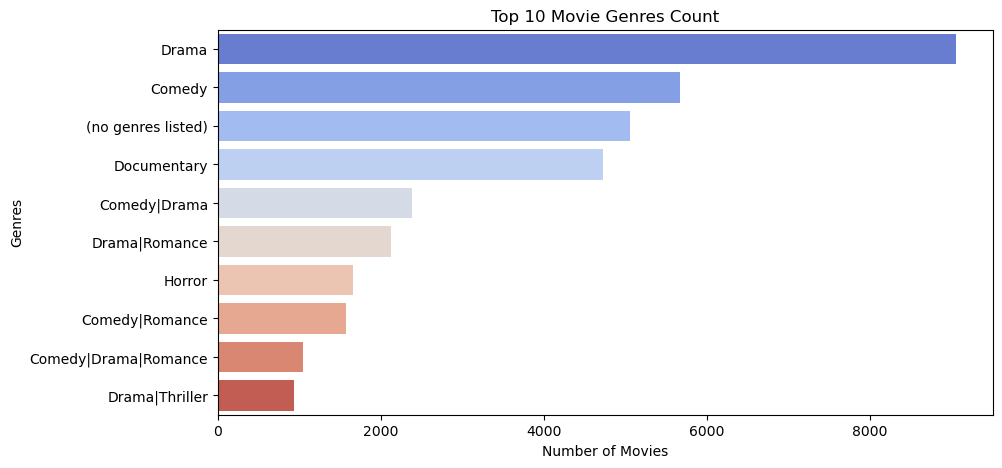

In [166]:
plt.figure(figsize=(10, 5))
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette="coolwarm")
plt.xlabel("Number of Movies")
plt.ylabel("Genres")
plt.title("Top 10 Movie Genres Count")
plt.show()


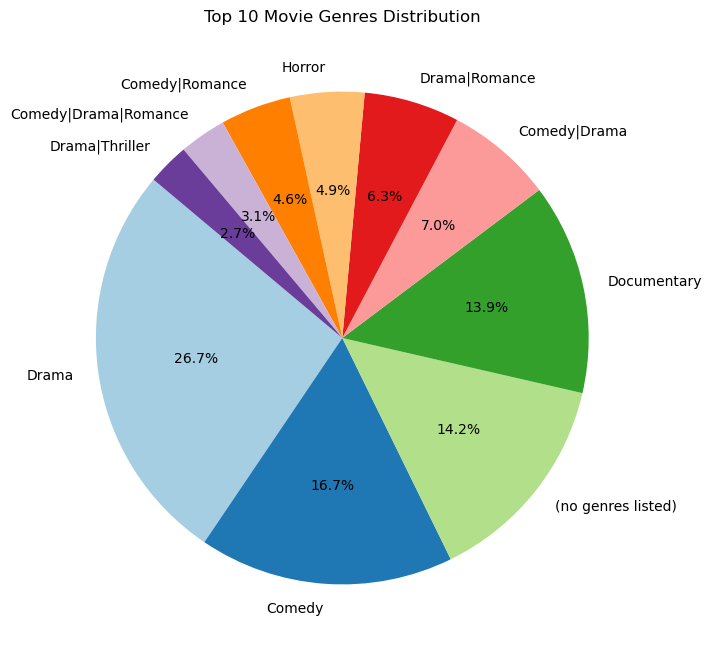

In [167]:
# Count occurrences of each genre
genre_counts = df['genres'].value_counts().head(10)  # Top 10 genres

# Create a Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title("Top 10 Movie Genres Distribution")
plt.show()


C:\Users\prave\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


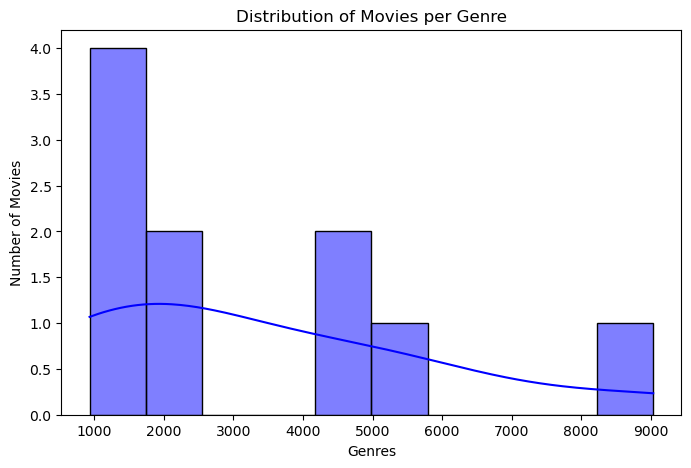

In [168]:
plt.figure(figsize=(8, 5))
sns.histplot(genre_counts, bins=10, kde=True, color="blue")
plt.xlabel("Genres")
plt.ylabel("Number of Movies")
plt.title("Distribution of Movies per Genre")
plt.show()


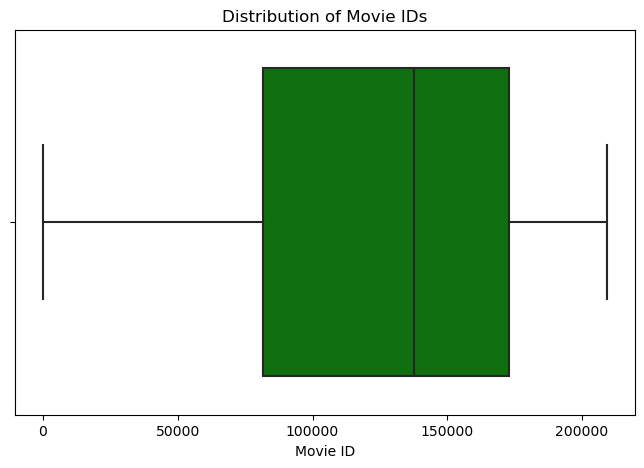

In [169]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["movieId"], color="green")
plt.xlabel("Movie ID")
plt.title("Distribution of Movie IDs")
plt.show()


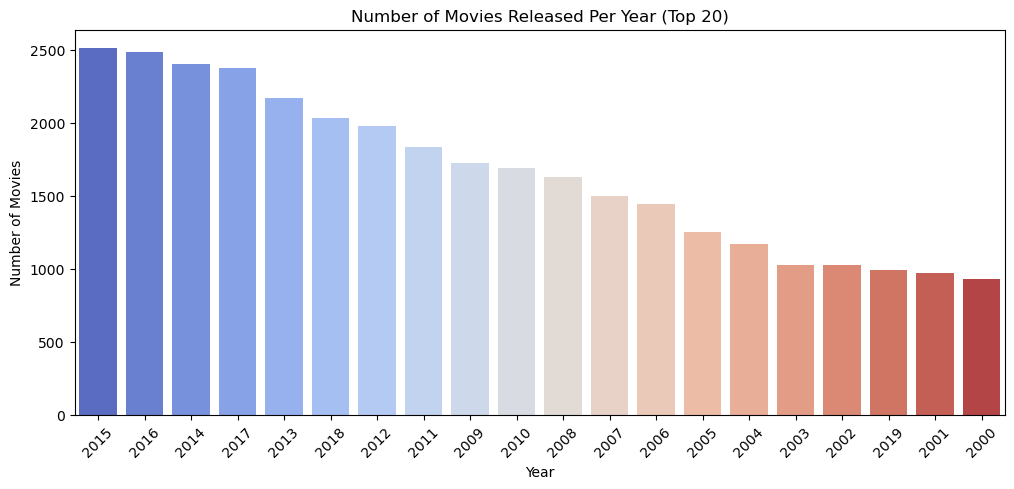

In [170]:
# Extract Year from Title (if present in dataset)
df["year"] = df["title"].str.extract(r"\((\d{4})\)")

# Drop missing years
df = df.dropna(subset=["year"])

# Convert to integer
df["year"] = df["year"].astype(int)

# Plot Movies Per Year
plt.figure(figsize=(12, 5))
sns.countplot(x=df["year"], palette="coolwarm", order=df["year"].value_counts().index[:20])
plt.xticks(rotation=45)
plt.xlabel("Year")
plt.ylabel("Number of Movies")
plt.title("Number of Movies Released Per Year (Top 20)")
plt.show()


In [171]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

In [172]:
# Define file path  
file_path = r"C:/Users/prave/OneDrive/Desktop/data/New folder/movies.csv"

# Load dataset  
df = pd.read_csv(file_path)  
print("Dataset Loaded Successfully")


Dataset Loaded Successfully


In [173]:
# Display first few rows  
print(df.head())


   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  


In [115]:
# Split dataset into train and test sets  
trainset, testset = train_test_split(p, test_size=0.2, random_state=42)  


In [116]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62423 entries, 0 to 62422
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  62423 non-null  int64 
 1   title    62423 non-null  object
 2   genres   62423 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.4+ MB
None


In [117]:
df = df.dropna()

In [118]:
target_column = df.columns[-1]  # Assuming the last column is the target
print(f'Target column identified: {target_column}')

Target column identified: genres


In [119]:
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

In [120]:
X = df.drop(columns=[target_column])
y = df[target_column]

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [122]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [123]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=5)  # Default is 5 neighbors
model.fit(X_train, y_train)

KNeighborsClassifier()

In [124]:
y_pred = model.predict(X_test)

In [125]:
#Calculate Mean Squared Error (MSE)
mse_value = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse_value:.2f}')

#Calculate Root Mean Squared Error (RMSE)
rmse_value = np.sqrt(mse_value)
print(f'Root Mean Squared Error (RMSE): {rmse_value:.2f}')

#Calculate Precision and Recall
precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=1)

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')


Mean Squared Error (MSE): 683106.82
Root Mean Squared Error (RMSE): 826.50
Precision: 0.16
Recall: 0.09
